# Region Proposal
### DATASET :: NWPU-RESISC45
 * Only Using Air Planes
 * G. Cheng, J. Han, X. Lu. Remote Sensing Image Scene Classification: Benchmark and State of the Art. Proceedings of the IEEE.)
 * <http://www.escience.cn/people/JunweiHan/NWPU-RESISC45.html>

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import sys
import random
import pandas as pd

from matplotlib import patches
from tqdm.notebook import tqdm

ROOT_DIR = os.path.abspath('../')
sys.path.append(ROOT_DIR)

from module.dataset import Dataset
from module.utils import *


### 1. System Path Setting

In [2]:
DATA_NAME = 'air_planes'
DATA_DIR = os.path.join(ROOT_DIR, 'data', DATA_NAME)
IMG_DIR = os.path.join(DATA_DIR, 'images')
ANN_DIR = os.path.join(DATA_DIR, 'annotations')

### 2. LOAD DATASET

In [3]:
dataset = Dataset()
dataset.AddImage(IMG_DIR)
dataset.ParseAnnotations(ANN_DIR)

In [4]:
def RegionProposal(img, img_file, is_visible=False):
    # 1. Extract Candidate Region of Interest Using Selective Search
    rois = SelectiveSearch(img)

    # 2. GT correspond to image
    gt_bbox = dataset.annotations[img_file]
    
    # 3. Separate to Pos/Neg Region
    regions, deltas = SeparateToRegions(gt_bbox, rois, th=0.5)

    if is_visible:
        fig, ax = plt.subplots(2, 2, figsize=(10, 10))
        DrawBoxes(img, gt_bbox, title='Ground Truth', ax=ax[0][0])
        DrawBoxes(img, rois, title='Candidate ROI', color='r', ax=ax[0][1])
        DrawBoxes(img, regions[np.where(regions[:,4] == 1)], title='Pos Regions', color='b', linestyle="-", ax=ax[1][0])
        DrawBoxes(img, regions[np.where(regions[:,4] == 0)], title='Neg Regions', color='c', linestyle="-", ax=ax[1][1])
        plt.tight_layout()
    
    return regions, deltas


### 3. Single Image Proposal Example

image_file:: 428452.jpg
Total Regions :: (0, 5)
Total Deltas :: (0, 4)


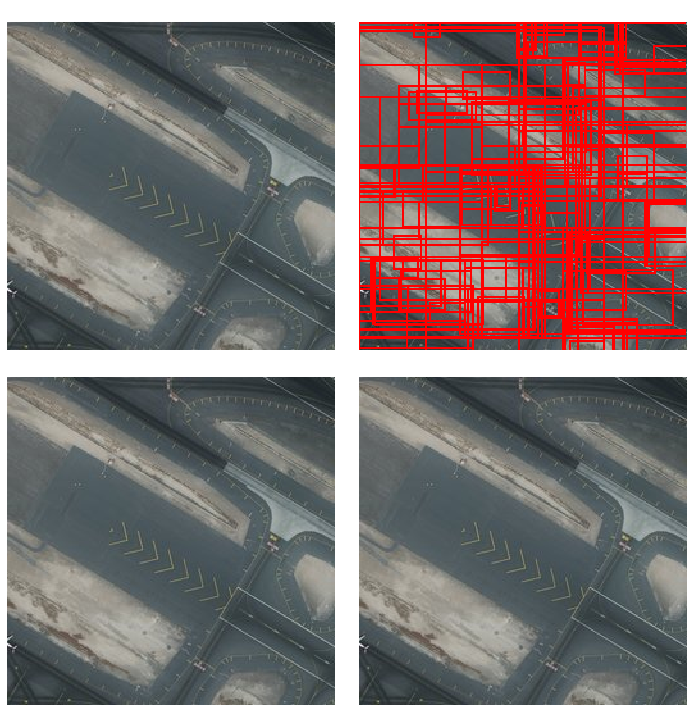

In [8]:
# image Load
# img_file = random.choice(list(dataset.images.values()))
# img_file = dataset.images[32]
img_file = '428452.jpg'
print('image_file::',img_file)
img = cv2.imread(os.path.join(IMG_DIR, img_file))
regions, deltas = RegionProposal(img, img_file, is_visible=True)
print('Total Regions ::', regions.shape)
print('Total Deltas ::', deltas.shape)

### 4. Overall Image Region Proposal and Save

In [9]:
cls_trn_img = np.array([], dtype=np.uint8).reshape(0, 224, 224, 3)
cls_trn_lb = np.array([], dtype=np.int32).reshape(0, 1)
reg_trn_img = np.array([], dtype=np.uint8).reshape(0, 224, 224, 3)
reg_trn_delta = np.array([], dtype=np.float32).reshape(0, 4)

for key in tqdm(dataset.images.keys()):
    print(dataset.images[key])
    img = cv2.imread(os.path.join(IMG_DIR, dataset.images[key]))
    regions, deltas = RegionProposal(img, dataset.images[key], is_visible=False)
    print(regions.shape)
    print(deltas.shape)
    
    _cls_trn_img, _cls_trn_lb, _reg_trn_img, _reg_trn_delta = WarppingImage(img, regions, deltas)
    cls_trn_img = np.vstack([cls_trn_img, _cls_trn_img])
    cls_trn_lb = np.vstack([cls_trn_lb, _cls_trn_lb])
    reg_trn_img = np.vstack([reg_trn_img, _reg_trn_img])
    reg_trn_delta = np.vstack([reg_trn_delta, _reg_trn_delta])
    print('--------------------------------------------------------------------------------------------------------------')

# Save Region Proposal Data
save_path = os.path.join(ROOT_DIR, 'experiments/traixn_data.npz')
np.savez_compressed(save_path, cls_trn_img=cls_trn_img, cls_trn_lb=cls_trn_lb, reg_trn_img=reg_trn_img, reg_trn_delta=reg_trn_delta)

airplane_527.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_083.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_209.jpg
(96, 5)
(24, 4)
--------------------------------------------------------------------------------------------------------------
airplane_041.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_487.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_399.jpg
(24, 5)
(6, 4)
--------------------------------------------------------------------------------------------------------------
airplane_115.jpg
(128, 5)
(32, 4)
---------------------------------------------------------------------------------------------------

(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_135.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_292.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_333.jpg
(92, 5)
(23, 4)
--------------------------------------------------------------------------------------------------------------
airplane_541.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_571.jpg
(56, 5)
(14, 4)
--------------------------------------------------------------------------------------------------------------
airplane_385.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airp

(64, 5)
(16, 4)
--------------------------------------------------------------------------------------------------------------
airplane_420.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_516.jpg
(104, 5)
(26, 4)
--------------------------------------------------------------------------------------------------------------
airplane_133.jpg
(32, 5)
(8, 4)
--------------------------------------------------------------------------------------------------------------
airplane_362.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_119.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_271.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airpl

(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_082.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_009.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_625.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_494.jpg
(124, 5)
(31, 4)
--------------------------------------------------------------------------------------------------------------
airplane_185.jpg
(88, 5)
(22, 4)
--------------------------------------------------------------------------------------------------------------
airplane_357.jpg
(84, 5)
(21, 4)
--------------------------------------------------------------------------------------------------------------
airp

(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_453.jpg
(124, 5)
(31, 4)
--------------------------------------------------------------------------------------------------------------
airplane_671.jpg
(84, 5)
(21, 4)
--------------------------------------------------------------------------------------------------------------
airplane_689.jpg
(36, 5)
(9, 4)
--------------------------------------------------------------------------------------------------------------
airplane_085.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_566.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_285.jpg
(64, 5)
(16, 4)
--------------------------------------------------------------------------------------------------------------
airpla

(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_419.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
428462.jpg
(16, 5)
(4, 4)
--------------------------------------------------------------------------------------------------------------
airplane_196.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_281.jpg
(92, 5)
(23, 4)
--------------------------------------------------------------------------------------------------------------
airplane_317.jpg
(116, 5)
(29, 4)
--------------------------------------------------------------------------------------------------------------
airplane_315.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_65

(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_539.jpg
(24, 5)
(6, 4)
--------------------------------------------------------------------------------------------------------------
airplane_284.jpg
(36, 5)
(9, 4)
--------------------------------------------------------------------------------------------------------------
airplane_368.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_556.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
Planes9.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_535.jpg
(80, 5)
(20, 4)
--------------------------------------------------------------------------------------------------------------
airplane_442

(84, 5)
(21, 4)
--------------------------------------------------------------------------------------------------------------
airplane_593.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_353.jpg
(120, 5)
(30, 4)
--------------------------------------------------------------------------------------------------------------
airplane_351.jpg
(92, 5)
(23, 4)
--------------------------------------------------------------------------------------------------------------
airplane_501.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_404.jpg
(96, 5)
(24, 4)
--------------------------------------------------------------------------------------------------------------
airplane_210.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airpl

(76, 5)
(19, 4)
--------------------------------------------------------------------------------------------------------------
airplane_439.jpg
(108, 5)
(27, 4)
--------------------------------------------------------------------------------------------------------------
airplane_302.jpg
(72, 5)
(18, 4)
--------------------------------------------------------------------------------------------------------------
airplane_207.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_699.jpg
(88, 5)
(22, 4)
--------------------------------------------------------------------------------------------------------------
airplane_298.jpg
(32, 5)
(8, 4)
--------------------------------------------------------------------------------------------------------------
airplane_559.jpg
(88, 5)
(22, 4)
--------------------------------------------------------------------------------------------------------------
airplane

(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_594.jpg
(116, 5)
(29, 4)
--------------------------------------------------------------------------------------------------------------
airplane_369.jpg
(84, 5)
(21, 4)
--------------------------------------------------------------------------------------------------------------
airplane_350.jpg
(80, 5)
(20, 4)
--------------------------------------------------------------------------------------------------------------
airplane_062.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_372.jpg
(48, 5)
(12, 4)
--------------------------------------------------------------------------------------------------------------
airplane_101.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airpl

(56, 5)
(14, 4)
--------------------------------------------------------------------------------------------------------------
airplane_150.jpg
(109, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_287.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_370.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_147.jpg
(68, 5)
(17, 4)
--------------------------------------------------------------------------------------------------------------
airplane_077.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_320.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airp

(84, 5)
(21, 4)
--------------------------------------------------------------------------------------------------------------
airplane_609.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_069.jpg
(88, 5)
(22, 4)
--------------------------------------------------------------------------------------------------------------
airplane_072.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_272.jpg
(64, 5)
(16, 4)
--------------------------------------------------------------------------------------------------------------
airplane_579.jpg
(60, 5)
(15, 4)
--------------------------------------------------------------------------------------------------------------
airplane_017.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airpla

(112, 5)
(28, 4)
--------------------------------------------------------------------------------------------------------------
airplane_003.jpg
(120, 5)
(30, 4)
--------------------------------------------------------------------------------------------------------------
airplane_377.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_469.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_331.jpg
(112, 5)
(28, 4)
--------------------------------------------------------------------------------------------------------------
airplane_581.jpg
(128, 5)
(32, 4)
--------------------------------------------------------------------------------------------------------------
airplane_679.jpg
(24, 5)
(6, 4)
--------------------------------------------------------------------------------------------------------------
airp

In [11]:
train_data = np.load(save_path)
print(train_data['cls_trn_img'].shape)
print(train_data['cls_trn_lb'].shape)
print(train_data['reg_trn_img'].shape)
print(train_data['reg_trn_delta'].shape)

(73373, 224, 224, 3)
(73373, 1)
(18381, 224, 224, 3)
(18381, 4)


In [35]:

train_data2 = np.load(os.path.join(ROOT_DIR, 'experiments/vgg16-airplane/train_data.npz'))
print(train_data2['cls_trn_img'].shape)
print(train_data2['cls_trn_lb'].shape)
print(train_data2['reg_trn_img'].shape)
print(train_data2['reg_trn_delta'].shape)


(40940, 224, 224, 3)
(40940, 1)
(19070, 224, 224, 3)
(19070, 4)
